In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
# from keras.optimizers import Adam, SGD
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [43]:

# contour_train_path = r'D:\Desktop\ML\sign_language\gesture1\contours\train'
# contour_test_path = r'D:\Desktop\ML\sign_language\gesture1\contours\test'

white_train_path = r'D:\Desktop\ML\sign_language\gesture1\edge\white\train'
white_test_path = r'D:\Desktop\ML\sign_language\gesture1\edge\white\test'

# contour_train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=contour_train_path, target_size=(64,64), classes =['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y'],  class_mode='categorical', batch_size=10,shuffle=True)
# contour_test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=contour_test_path, target_size=(64,64), classes = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y'], class_mode='categorical', batch_size=10, shuffle=True)

white_train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=white_train_path, target_size=(64,64), classes =['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y'],  class_mode='categorical', batch_size=10,shuffle=True)
white_test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=white_test_path, target_size=(64,64), classes = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y'], class_mode='categorical', batch_size=10, shuffle=True)

# imgs, labels = next(contour_train_batches)
imgs2, labels2=next(white_train_batches)


Found 10234 images belonging to 35 classes.
Found 1435 images belonging to 35 classes.


In [44]:
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

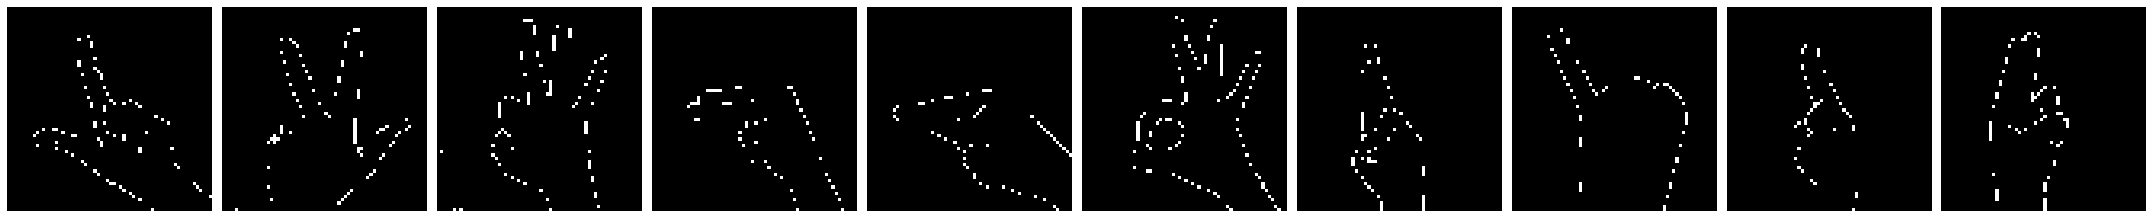

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0

In [46]:
# FOR CONTOUR
# plotImages(imgs)
# print(imgs.shape)
# print(labels)

# FOR EDGE

plotImages(imgs2)
print(imgs2.shape)
print(labels2)

In [47]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(64,activation ="relu"),
    Dense(128,activation ="relu"),
    Dense(128,activation ="relu"),
    Dense(35,activation ="softmax")
])

In [48]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# model.compile(optimizer=gradient_descent_v2.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



In [49]:

# # # FOR CONTOUR
# history2 = model.fit(contour_train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = contour_test_batches)#, checkpoint])
# imgs, labels = next(contour_train_batches) # For getting next batch of imgs...

# imgs, labels = next(contour_test_batches) # For getting next batch of imgs...
# scores = model.evaluate(imgs, labels, verbose=0)
# print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

# FOR EDGE
history2 = model.fit(white_train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = white_test_batches)#, checkpoint])
imgs2, labels2 = next(white_train_batches) # For getting next batch of imgs...

imgs2, labels2 = next(white_test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs2, labels2, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/10
1024/1024 [==============================] - 182s 177ms/step - loss: 1.5244 - accuracy: 0.5502 - val_loss: 1.5887 - val_accuracy: 0.6760 - lr: 0.0010
Epoch 2/10
1024/1024 [==============================] - 64s 62ms/step - loss: 0.1799 - accuracy: 0.9416 - val_loss: 1.3644 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 3/10
1024/1024 [==============================] - 59s 58ms/step - loss: 0.0975 - accuracy: 0.9686 - val_loss: 1.4868 - val_accuracy: 0.8369 - lr: 0.0010
Epoch 4/10
1024/1024 [==============================] - 65s 63ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 1.4033 - val_accuracy: 0.8718 - lr: 2.0000e-04
loss of 1.2221022844314575; accuracy of 89.99999761581421%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

{'loss': [1.524375557899475, 0.1799273043870926, 0.09748101979494095, 0.01057426631450653], 'accuracy': [0.5502247214317322, 0.9415673017501831, 0.9686339497566223, 0.9966777563095093], 'val_loss': [1.5886528491973877, 1.364438533782959, 1.4867973327636719, 1.403327226638794], 'val_accuracy': [0.6759582161903381, 0.8362369537353516, 0.8369337916374207, 0.8717769980430603], 'lr': [0.001, 0.001, 0.001, 0.00020000001]}


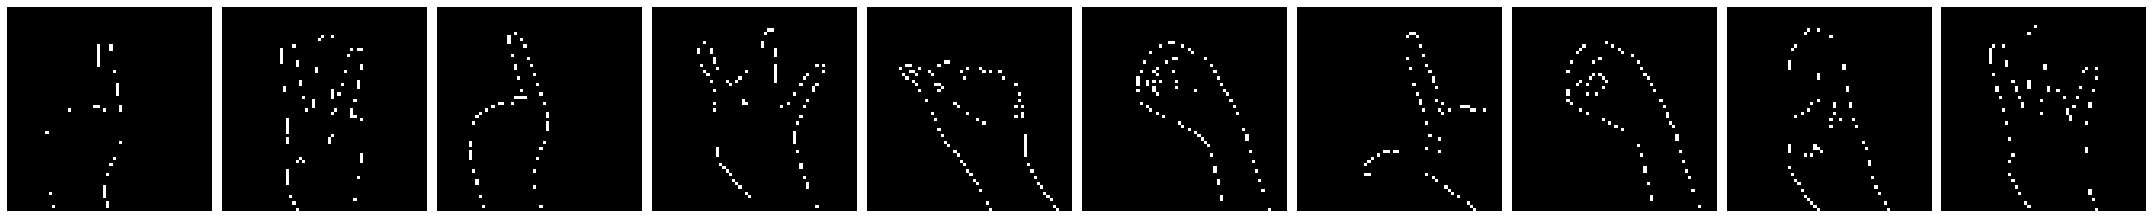

In [50]:
# model.save('contour_sign_detection.h5')
model.save('edge_sign_detection.h5')

print(history2.history)

# imgs, labels = next(contour_test_batches)
imgs2, labels2 = next(white_test_batches)
# plotImages(imgs)
plotImages(imgs2)

In [51]:
# model = keras.models.load_model(r"contour_sign_detection.h5")
model = keras.models.load_model(r"edge_sign_detection.h5")

scores = model.evaluate(imgs2, labels2, verbose=0)
# scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

# model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


loss of 0.6249337196350098; accuracy of 80.0000011920929%


['loss', 'accuracy']

predictions on a small set of test data--

17            27            20            14            3            3            21            22            23            34            

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

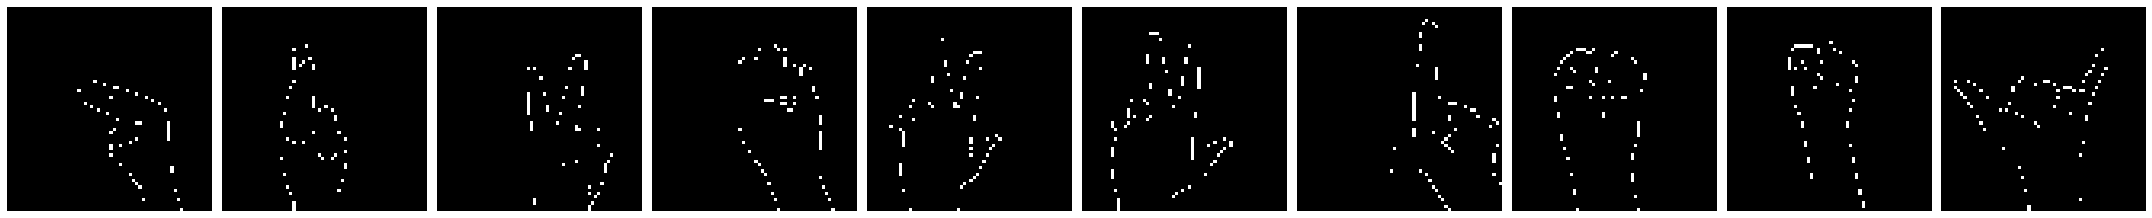

Actual labels
17
27
31
14
3
3
21
22
23
34
(10, 64, 64, 3)


{'loss': [1.524375557899475,
  0.1799273043870926,
  0.09748101979494095,
  0.01057426631450653],
 'accuracy': [0.5502247214317322,
  0.9415673017501831,
  0.9686339497566223,
  0.9966777563095093],
 'val_loss': [1.5886528491973877,
  1.364438533782959,
  1.4867973327636719,
  1.403327226638794],
 'val_accuracy': [0.6759582161903381,
  0.8362369537353516,
  0.8369337916374207,
  0.8717769980430603],
 'lr': [0.001, 0.001, 0.001, 0.00020000001]}

In [53]:
word_dict = {'0':'Zero','1':'One','2':'Two','3':'Three','4':'Four','5':'Five','6':'Six','7':'Seven','8':'Eight','9':'Nine','10':'A','11':'B','12':'C','13':'D','14':'E','15':'F','16':'G','17':'H','18':'I','19':'J','20':'K','21':'L','22':'M','23':'N','24':'O','25':'P','26':'Q','27':'R','28':'S','29':'T','30':'U','31':'V','32':'W','33':'X','34':'Y'}

print("predictions on a small set of test data--")
imgs2, labels2=next(white_test_batches)
predictions = model.predict(imgs2, verbose=0)
print("")
for ind, i in enumerate(predictions):
    print(np.argmax(i), end="            ")
#     print(word_dict[str(np.argmax(i))], end='   ')

plotImages(imgs2)
print('Actual labels')
for i in labels2:
#     print(word_dict[np.argmax(i)], end='   ')
    print(np.argmax(i))

print(imgs2.shape)

history2.history